In [1]:
import glob # para mexer com vários arquivos varrendo todos com mesma extensão e transformando num grande data set
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt # mais usadas essa e a de baixo
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
%matplotlib inline
matplotlib.style.use('default')

## Manipulando dados que serão usados

In [10]:
elo_df = pd.read_csv('/home/andre/Documents/Machine Learning no futebol/Elo Score/dataset_elo_espanha.csv', sep=';')
elo_df

,HomeTeam,AwayTeam,FTR,B365H,B365D,B365A,Div,Date,home_elo,away_elo
0,Malaga,Valencia,H,2.63,3.20,2.80,SP1,2015-02-02,1758.667480,1843.810669
1,Las Palmas,Malaga,H,2.25,3.39,3.20,SP1,2018-02-05,1562.041260,1624.730469
2,Valencia,Malaga,D,1.75,3.60,5.00,SP1,2016-12-04,1696.063599,1733.722778
3,Espanol,Barcelona,A,15.00,7.50,1.18,SP1,2017-04-29,1723.528442,2004.134888
4,Real Madrid,Levante,H,1.08,12.00,23.00,SP1,2015-10-17,2050.751221,1665.435303
5,Celta,Sevilla,H,3.00,3.25,2.38,SP1,2014-03-29,1675.472778,1809.385742
6,Valencia,Girona,A,1.50,4.00,7.50,SP1,2013-11-03,1769.353638,1559.164673
7,Ath Bilbao,Villarreal,H,2.15,3.30,3.50,SP1,2016-11-20,1788.675537,1779.348145
8,Ath Bilbao,Real Madrid,D,5.25,4.00,1.62,SP1,2014-02-02,1763.010620,2033.368652
9,Atletico,Granada,H,1.22,6.00,15.00,SP1,2016-04-17,2056.897705,1650.022949


In [11]:
elo_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 293 entries, 0 to 292
Data columns (total 10 columns):
HomeTeam    293 non-null object
AwayTeam    293 non-null object
FTR         293 non-null object
B365H       293 non-null float64
B365D       293 non-null float64
B365A       293 non-null float64
Div         293 non-null object
Date        293 non-null object
home_elo    293 non-null float64
away_elo    293 non-null float64
dtypes: float64(5), object(5)
memory usage: 17.2+ KB


In [12]:
elo_df_new = elo_df.copy() # para não trabalha diretamente com o original

In [13]:
elo_df_new['HomeElo/AwayElo'] = elo_df_new['home_elo'] / elo_df_new['away_elo']

In [14]:
# podemos observar que HomeElo/AwayElo > 1 indica mandante mais forte e HomeElo/AwayElo < 1 indica
# mandante menos forte, ou seja, visitante mais forte

elo_df_new

,HomeTeam,AwayTeam,FTR,B365H,B365D,B365A,Div,Date,home_elo,away_elo,HomeElo/AwayElo
0,Malaga,Valencia,H,2.63,3.20,2.80,SP1,2015-02-02,1758.667480,1843.810669,0.953822
1,Las Palmas,Malaga,H,2.25,3.39,3.20,SP1,2018-02-05,1562.041260,1624.730469,0.961416
2,Valencia,Malaga,D,1.75,3.60,5.00,SP1,2016-12-04,1696.063599,1733.722778,0.978278
3,Espanol,Barcelona,A,15.00,7.50,1.18,SP1,2017-04-29,1723.528442,2004.134888,0.859986
4,Real Madrid,Levante,H,1.08,12.00,23.00,SP1,2015-10-17,2050.751221,1665.435303,1.231360
5,Celta,Sevilla,H,3.00,3.25,2.38,SP1,2014-03-29,1675.472778,1809.385742,0.925990
6,Valencia,Girona,A,1.50,4.00,7.50,SP1,2013-11-03,1769.353638,1559.164673,1.134809
7,Ath Bilbao,Villarreal,H,2.15,3.30,3.50,SP1,2016-11-20,1788.675537,1779.348145,1.005242
8,Ath Bilbao,Real Madrid,D,5.25,4.00,1.62,SP1,2014-02-02,1763.010620,2033.368652,0.867039
9,Atletico,Granada,H,1.22,6.00,15.00,SP1,2016-04-17,2056.897705,1650.022949,1.246587


## Gráfico de dispersão

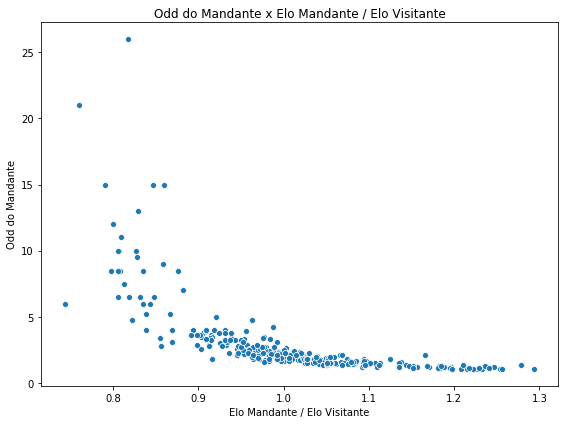

In [17]:
plt.rcParams['figure.figsize'] = [8,6]

# o seaborn tem o método scatterplot que gera o gráfico de dispersão
ax = sns.scatterplot(y='B365H', x='HomeElo/AwayElo', data=elo_df_new)
ax.set(ylabel='Odd do Mandante', xlabel='Elo Mandante / Elo Visitante', title='Odd do Mandante x Elo Mandante / Elo Visitante')
plt.tight_layout()
plt.savefig('odd_elo_score.png')
plt.show()

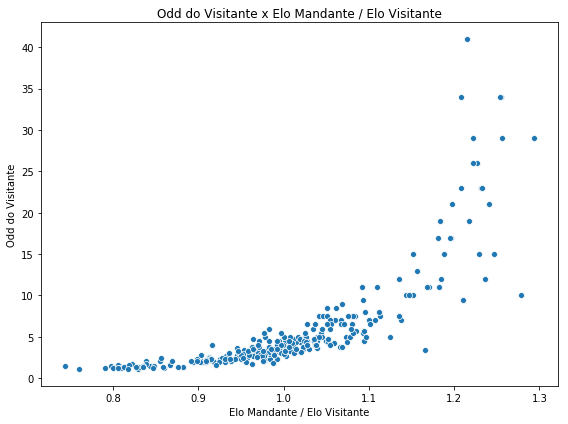

In [18]:
plt.rcParams['figure.figsize'] = [8,6]

# o seaborn tem o método scatterplot que gera o gráfico de dispersão
ax = sns.scatterplot(y='B365A', x='HomeElo/AwayElo', data=elo_df_new)
ax.set(ylabel='Odd do Visitante', xlabel='Elo Mandante / Elo Visitante', title='Odd do Visitante x Elo Mandante / Elo Visitante')
plt.tight_layout()
plt.savefig('odd_elo_score.png')
plt.show()

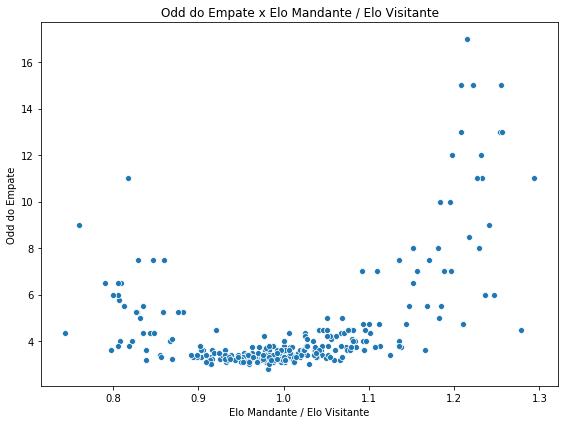

In [19]:
plt.rcParams['figure.figsize'] = [8,6]

# o seaborn tem o método scatterplot que gera o gráfico de dispersão
ax = sns.scatterplot(y='B365D', x='HomeElo/AwayElo', data=elo_df_new)
ax.set(ylabel='Odd do Empate', xlabel='Elo Mandante / Elo Visitante', title='Odd do Empate x Elo Mandante / Elo Visitante')
plt.tight_layout()
plt.savefig('odd_elo_score.png')
plt.show()

## Introdução às correlações que são a base do Heatmap

In [23]:
# "corr()" de correlation é a correlação de uma variável com outra. quanto uma explica a outra
# temos um dataframe de correlação. quando dá negativo é pq uma variável aumenta a outra diminui
# enquanto mais próximo de -1 mais inversamente proprocionais são as variáveis
# quando dá positivo é pq quando uma aumenta a outra tbm aumenta
# enquanto mais próximo de 1 mais correlação tem mais diretamente proprocionais as variáveis são
# os valores estão em porcentagens, logo, 0.601445 significa 60.14% ou 60% arredondando

# exemplo 0.9 (90%) explica mesmo uma variável. isso é usado para eliminar alguma variável
# no caso abaixo temos por exemplo a variável B365A sofrendo muita correlação (+- 70%) da variável home_elo
# isso faz sentido pois à medida que o home_elo aumenta (força do time da casa aumenta), sobe a odd do time visitante

# quando 2 variáveis (ou 4 ou 6... - sempre em pares) tem alta correlação podemos eliminar uma, pois a outra já explica o que queremos ver

# isso é só a nível didático apenas para entender mas NÃO é o heatmap

elo_df_new[['B365H','B365A','B365D','away_elo','home_elo']].corr()

,B365H,B365A,B365D,away_elo,home_elo
B365H,1.000000,-0.349269,0.113982,0.657600,-0.306280
B365A,-0.349269,1.000000,0.865721,-0.348441,0.709450
B365D,0.113982,0.865721,1.000000,-0.007550,0.601445
away_elo,0.657600,-0.348441,-0.007550,1.000000,0.001487
home_elo,-0.306280,0.709450,0.601445,0.001487,1.000000


## Heatmap

'Versão do matplotlib: 3.0.2'

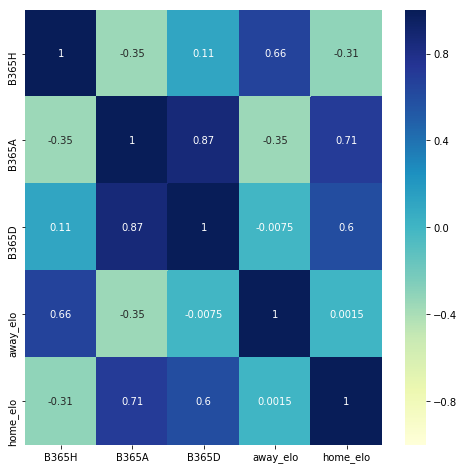

In [39]:
# Com o heatmap temos uma tabela de correlação de variáveis parecida com a acima, mas com cor, facilitando visualmente
# a leitura. Cor mais escura pode significar mais correlação e menos escura menos correlação e vice-versa.

cmap = 'YlGnBu' # aqui posso escolher cores. se não definir cor, fica a cor padrão e então no código onde tiver cmap 
# que foi a variável que criei, eu deleto.

display(f'Versão do matplotlib: {matplotlib.__version__}')
plt.figure(figsize=(8,8))
sns.heatmap(elo_df_new[['B365H','B365A','B365D','away_elo','home_elo']].corr(),vmin=-1, vmax=1, cmap=cmap, annot=True);

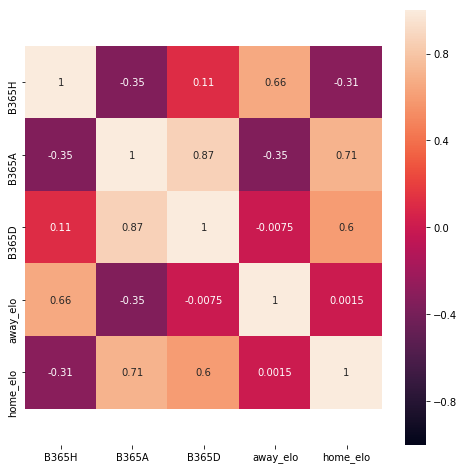

In [40]:
# fazendo de outra forma. aqui não usei cmap e a cor está padrão e desloquei (bottom, top) valores 
# em cada quadrado mas que não mudou nesse caso. É mais para ajustar qnd o valor fica fora do respectivo quadrado

plt.figure(figsize=(8,8))
ax = sns.heatmap(elo_df_new[['B365H','B365A','B365D','away_elo','home_elo']].corr(),vmin=-1, vmax=1, 
                 annot=True);
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5);

In [41]:
# como o triângulo de cima é espelhado abaixo, aqui estou fazendo uma máscara para 
# mostrar apenas a parte de cima

m = np.zeros_like(elo_df_new[['B365H','B365A','B365D','away_elo','home_elo']].corr(), dtype=np.bool)
m

array([[False, False, False, False, False],
       [False, False, False, False, False],
       [False, False, False, False, False],
       [False, False, False, False, False],
       [False, False, False, False, False]])

In [42]:
np.triu_indices_from(m)

(array([0, 0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 3, 3, 4], dtype=int32),
 array([0, 1, 2, 3, 4, 1, 2, 3, 4, 2, 3, 4, 3, 4, 4], dtype=int32))

In [81]:
m[np.triu_indices_from(m)] = True

In [82]:
m

array([[ True,  True,  True,  True,  True],
       [False,  True,  True,  True,  True],
       [False, False,  True,  True,  True],
       [False, False, False,  True,  True],
       [False, False, False, False,  True]])

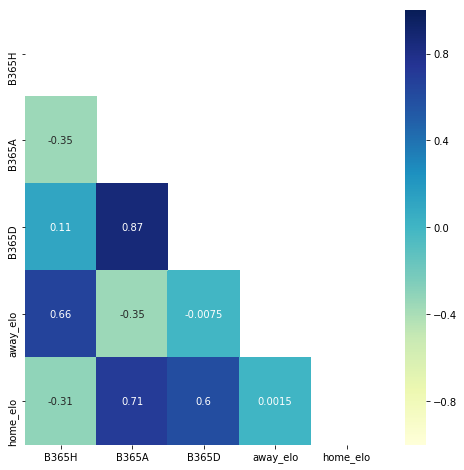

In [83]:
cmap = 'YlGnBu'

# máscara para mostrar apenas a parte de cima
mask = np.zeros_like(elo_df_new[['B365H','B365A','B365D','away_elo','home_elo']].corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=(8,8))
sns.heatmap(elo_df_new[['B365H','B365A','B365D','away_elo','home_elo']].corr(),vmin=-1, vmax=1, 
                 cmap=cmap, annot=True, mask=mask);